# Visualizing Earnings Based On College Majors
We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012.

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more.
Here are some of the columns in the dataset:
* Rank - Rank by median earnings (the dataset is ordered by this column).
* Major_code - Major code.
* Major - Major description.
* Major_category - Category of major.
* Total - Total number of people with major.
* Sample_size - Sample size (unweighted) of full-time, year-round ONLY (used for earnings).
* Men - Male graduates.
* Women - Female graduates.
* ShareWomen - Women as share of total.
* Employed - Number employed.
* Median - Median salary of full-time, year-round workers.
* Low_wage_jobs - Number in low-wage service jobs.
* Full_time - Number employed 35 hours or more.
* Part_time - Number employed less than 35 hours.

Using visualizations, we can start to explore questions from the dataset like:
* Do students in more popular majors make more money? - using scatter plots
* How many majors are predominantly male? Predominantly female? - using histograms
* Which category of majors have the most students? - using bar plots

Let's prepare the dataset for visualization

In [1]:
import warnings
warnings.simplefilter(action='ignore')
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

recent_grads = pd.read_csv('recent-grads.csv')

In [2]:
recent_grads.iloc[0,:]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                  2339.0
Men                                    2057.0
Women                                   282.0
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                    0.018381
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [3]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [4]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [5]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [11]:
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  172 non-null    int64  
 1   Major_code            172 non-null    int64  
 2   Major                 172 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        172 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           172 non-null    int64  
 9   Employed              172 non-null    int64  
 10  Full_time             172 non-null    int64  
 11  Part_time             172 non-null    int64  
 12  Full_time_year_round  172 non-null    int64  
 13  Unemployed            172 non-null    int64  
 14  Unemployment_rate     172 non-null    float64
 15  Median                1

In [6]:
recent_grads.isna().sum()

Rank                    0
Major_code              0
Major                   0
Total                   1
Men                     1
Women                   1
Major_category          0
ShareWomen              1
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64

In [7]:
# Drop rows with missing values
recent_grads.dropna(axis=0, inplace=True)
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.00000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,87.377907,3895.953488,39370.081395,16723.406977,22646.674419,0.522223,357.941860,31355.80814,26165.767442,8877.232558,19798.843023,2428.412791,0.068024,40076.744186,29486.918605,51386.627907,12387.401163,13354.325581,3878.633721
std,49.983181,1679.240095,63483.491009,28122.433474,41057.330740,0.231205,619.680419,50777.42865,42957.122320,14679.038729,33229.227514,4121.730452,0.030340,11461.388773,9190.769927,14882.278650,21344.967522,23841.326605,6960.467621
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.00000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.750000,2403.750000,4549.750000,2177.500000,1778.250000,0.336026,42.000000,3734.75000,3181.000000,1013.750000,2474.750000,299.500000,0.050261,33000.000000,24000.000000,41750.000000,1744.750000,1594.000000,336.750000
50%,87.500000,3608.500000,15104.000000,5434.000000,8386.500000,0.534024,131.000000,12031.50000,10073.500000,3332.500000,7436.500000,905.000000,0.067544,36000.000000,27000.000000,47000.000000,4467.500000,4603.500000,1238.500000
75%,130.250000,5503.250000,38909.750000,14631.000000,22553.750000,0.703299,339.000000,31701.25000,25447.250000,9981.000000,17674.750000,2397.000000,0.087247,45000.000000,33250.000000,58500.000000,14595.750000,11791.750000,3496.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.00000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


### Scatter Plots

We will generate scatter plots to explore the following relations:
* Sample_size and Median
* Sample_size and Unemployment_rate
* Full_time and Median
* ShareWomen and Unemployment_rate
* Men and Median
* Women and Median

Then we will use the plots to explore the following questions:
* Do students in more popular majors make more money?
* Do students that majored in subjects that were majority female make more money?
* Is there any link between the number of full-time employees and median salary?

Text(0.5, 1.0, 'Sample_size vs. Median')

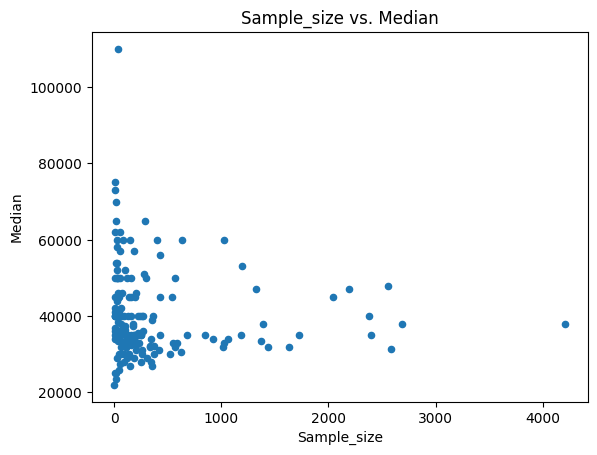

In [8]:
ax1 = recent_grads.plot(x='Sample_size', y='Median', kind='scatter')
ax1.set_title('Sample_size vs. Median')

This chart indicates that smaller sample sizes are represented across median earnings. From statistical analysis, we know that sample size from min to 75th percentile are under 350. Higher sample sizes are outliers. Median income is populated around the 20k to 80k range.

For larger the sample sizes, median earnings are around the 30-50k range.

Text(0.5, 1.0, 'Sample_size vs. Unemployment_rate')

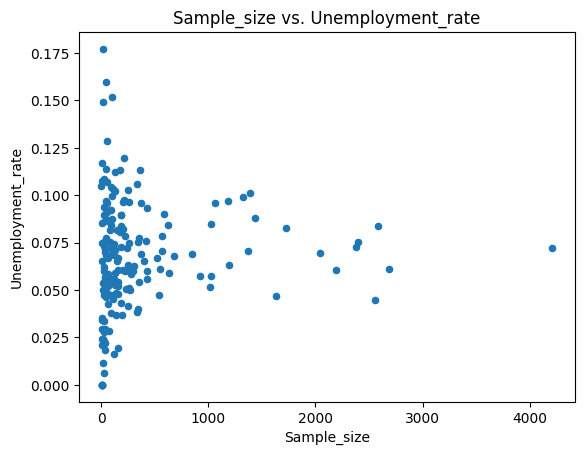

In [9]:
ax2 = recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')
ax2.set_title('Sample_size vs. Unemployment_rate')

Again, unemployment rate is spread evenly across smaller sample sizes (under 1k). Larger sample sizes have unemployment rates within the 5%-10% range.

Text(0.5, 1.0, 'Full_time vs. Median')

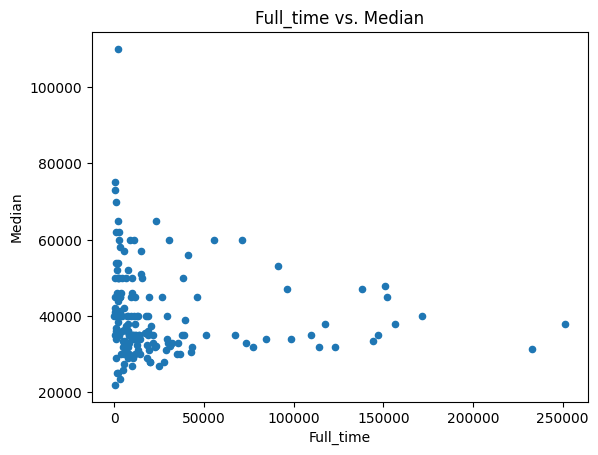

In [10]:
ax3 = recent_grads.plot(x='Full_time', y='Median', kind='scatter')
ax3.set_title('Full_time vs. Median')

Full time workers from most majors have a median earning between 20-80k. However, full time workers from most majors are under 50k. For majors with larger full time workers, median earnings are in the 30-50k range.

Text(0.5, 1.0, 'ShareWomen vs. Unemployment_rate')

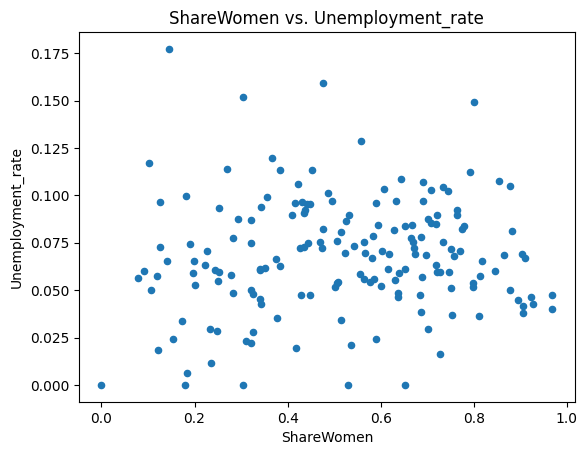

In [12]:
ax4 = recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')
ax4.set_title('ShareWomen vs. Unemployment_rate')

Women are represented across all unemployment rate levels.

For programs with higher share of women, unemployment is on the mid to high range of the chart.

Text(0.5, 1.0, 'Men vs. Median')

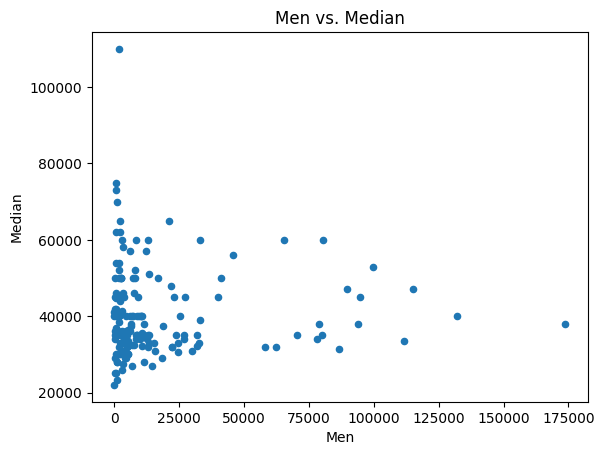

In [13]:
ax5 = recent_grads.plot(x='Men', y='Median', kind='scatter')
ax5.set_title('Men vs. Median')

Median income for men is in the 20k-80k range.

Text(0.5, 1.0, 'Women vs. Median')

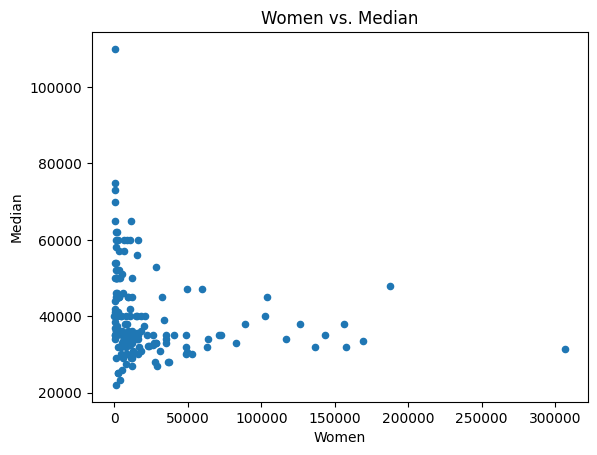

In [14]:
ax6 = recent_grads.plot(x='Women', y='Median', kind='scatter')
ax6.set_title('Women vs. Median')

Median income for women is in the 20k-80k range.

The sample size spread for women is larger than for men.

In [ ]:
# # Attempt
# fig, ax = plt.subplots()
#
# ax1 = fig.add_subplot(2,3,1)
# ax1.scatter(recent_grads['Sample_size'], recent_grads['Median'])
# # ax1.set_title('Sample_size vs. Median')
# #ax1.set_ylim(0, 50)
#
# ax2 = fig.add_subplot(2,3,2)
# ax2.scatter(recent_grads['Sample_size'], recent_grads['Unemployment_rate'])
# # ax2.set_title('Sample_size vs. Unemployment_rate')
# #ax2.set_ylim(0, 50)
#
# ax3 = fig.add_subplot(2,3,3)
# ax3.scatter(recent_grads['Full_time'], recent_grads['Median'])
# # ax3.set_title('Full_time vs. Median')
# #ax3.set_ylim(0, 50)
#
# ax4 = fig.add_subplot(2,3,4)
# ax4.scatter(recent_grads['ShareWomen'], recent_grads['Unemployment_rate'])
# # ax4.set_title('ShareWomen vs. Unemployment_rate')
# # ax4.set_ylim(0, 50)
#
# ax5 = fig.add_subplot(2,3,5)
# ax5.scatter(recent_grads['Men'], recent_grads['Median'])
# # ax5.set_title('Men vs. Median')
# # ax5.set_ylim(0, 50)
#
# ax6 = fig.add_subplot(2,3,6)
# ax6.scatter(recent_grads['Women'], recent_grads['Median'])
# # ax6.set_title('Women vs. Median')
# # ax6.set_ylim(0, 50)
#
# plt.show()

### Histograms

We will generate histograms to explore the distributions of the following columns:
* Sample_size
* Median
* Employed
* Full_time
* ShareWomen
* Unemployment_rate
* Men
* Women

We will experiment with different bin sizes and ranges when generating these histograms.

We start by conducting general statistical analysis on the columns in order to determine appropriate ranges and bin sizes.

In [16]:
recent_grads[['Sample_size', 'Median', 'Employed', 'Full_time', 'ShareWomen', 'Unemployment_rate', 'Men', 'Women']].describe()

,Sample_size,Median,Employed,Full_time,ShareWomen,Unemployment_rate,Men,Women
count,172.000000,172.000000,172.00000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,357.941860,40076.744186,31355.80814,26165.767442,0.522223,0.068024,16723.406977,22646.674419
std,619.680419,11461.388773,50777.42865,42957.122320,0.231205,0.030340,28122.433474,41057.330740
min,2.000000,22000.000000,0.00000,111.000000,0.000000,0.000000,119.000000,0.000000
25%,42.000000,33000.000000,3734.75000,3181.000000,0.336026,0.050261,2177.500000,1778.250000
50%,131.000000,36000.000000,12031.50000,10073.500000,0.534024,0.067544,5434.000000,8386.500000
75%,339.000000,45000.000000,31701.25000,25447.250000,0.703299,0.087247,14631.000000,22553.750000
max,4212.000000,110000.000000,307933.00000,251540.000000,0.968954,0.177226,173809.000000,307087.000000


<AxesSubplot: >

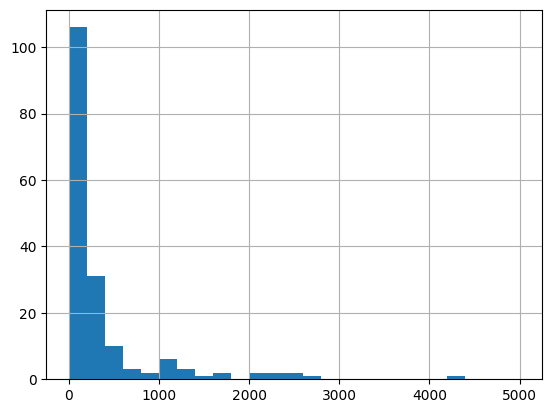

In [15]:
recent_grads['Sample_size'].hist(bins=25, range=(0,5000))

<AxesSubplot: >

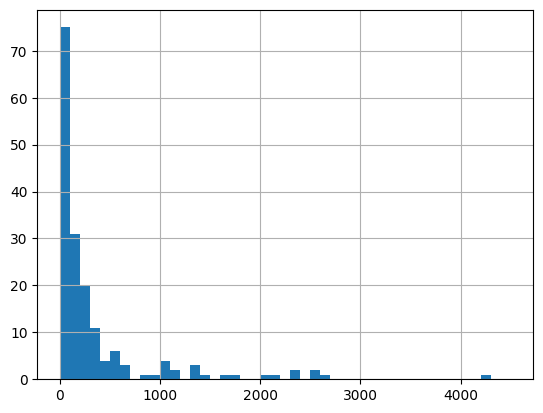

In [17]:
recent_grads['Sample_size'].hist(bins=45, range=(0,4500))

<AxesSubplot: >

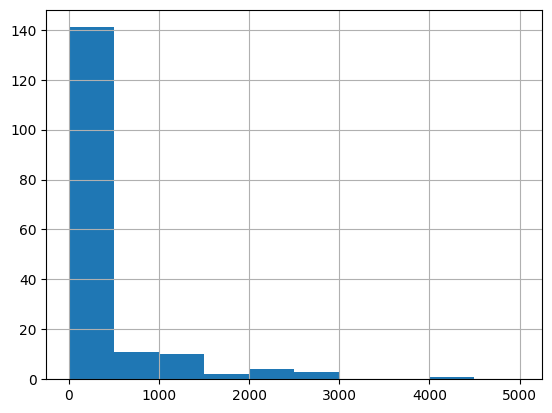

In [18]:
recent_grads['Sample_size'].hist(bins=10, range=(0,5000))

The most frequent sample sizes are between 0 and 500.

<AxesSubplot: >

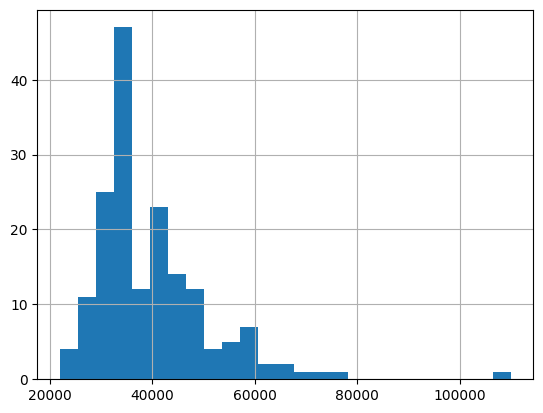

In [21]:
recent_grads['Median'].hist(bins=25, range=(22000,110000))

Median earnings distribution is a near normal distribution, although it is also skewed right, with the max value as an outlier. We'll remove the outlier from the range and plot.

<AxesSubplot: >

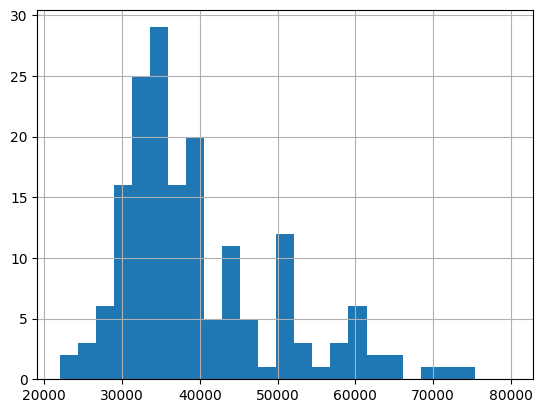

In [22]:
recent_grads['Median'].hist(bins=25, range=(22000,80000))

We'll reattempt with more bins to get an idea of outlier spread on the right end of the x-axis.

<AxesSubplot: >

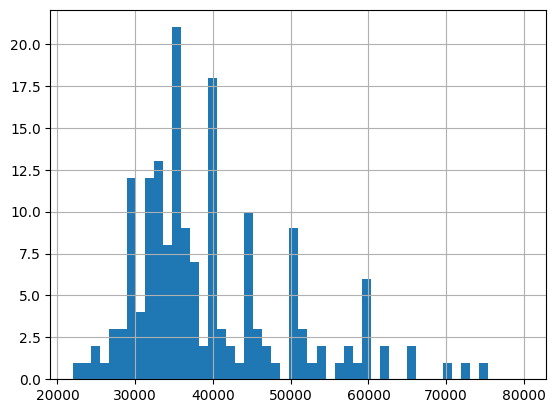

In [24]:
recent_grads['Median'].hist(bins=50, range=(22000, 80000))

Findings remain the same.

<AxesSubplot: >

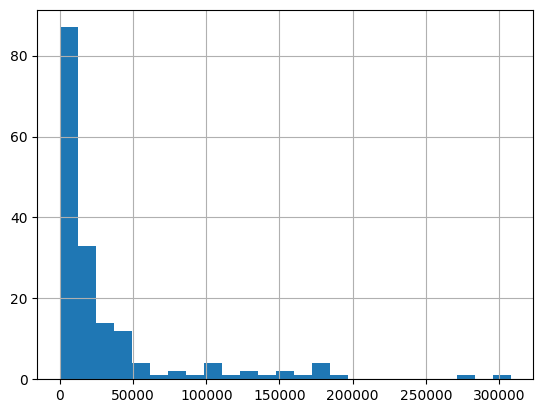

In [25]:
recent_grads['Employed'].hist(bins=25, range=(0,308000))

The distribution of employed graduates is skewed right. Programs with fewer employed graduates (under 50k) have more frequency than those with higher graduates.

This may imply that programs producing fewer graduates are more likely to have them employed than those producing many graduates.

<AxesSubplot: >

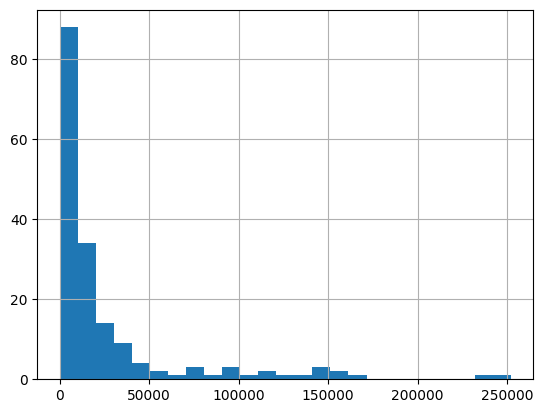

In [30]:
recent_grads['Full_time'].hist(bins=25, range=(100,252000))

Another right skewed distribution where programs with fewer full time employed graduates are more frequent.

<AxesSubplot: >

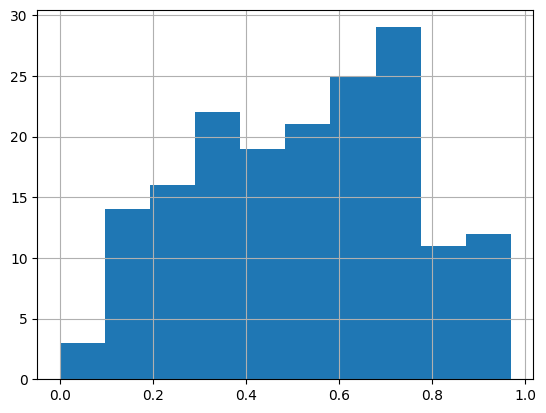

In [28]:
recent_grads['ShareWomen'].hist()

This is our first left-skewed distribution. This means most programs have a significant share of women in their class.

<AxesSubplot: >

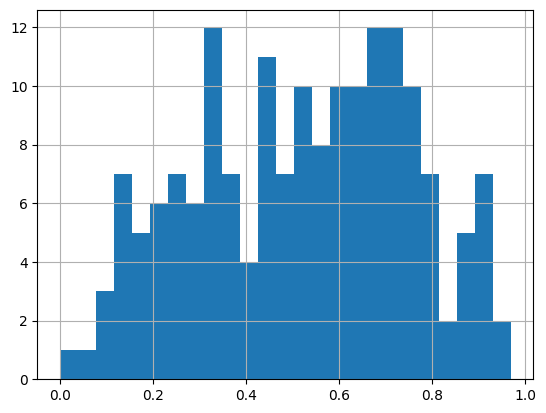

In [29]:
recent_grads['ShareWomen'].hist(bins=25)

With more bins, the distribution looks more normal.

<AxesSubplot: >

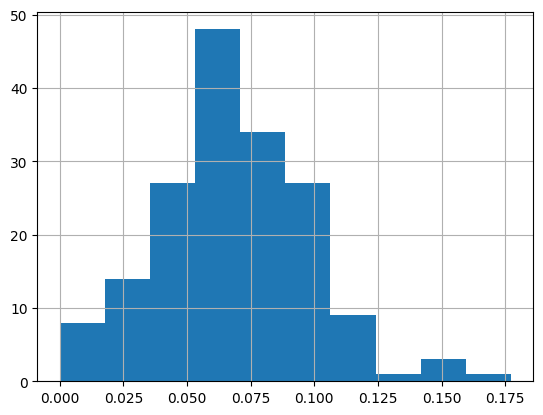

In [31]:
recent_grads['Unemployment_rate'].hist()

<AxesSubplot: >

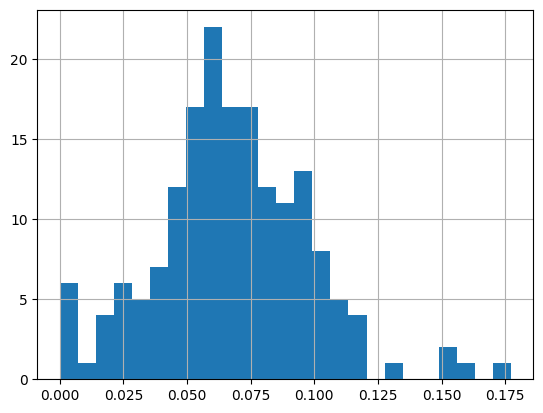

In [32]:
recent_grads['Unemployment_rate'].hist(bins=25)

Unemployment rate has a normal distribution with 6% as the most frequent number of unemployed graduates in programs.

<AxesSubplot: >

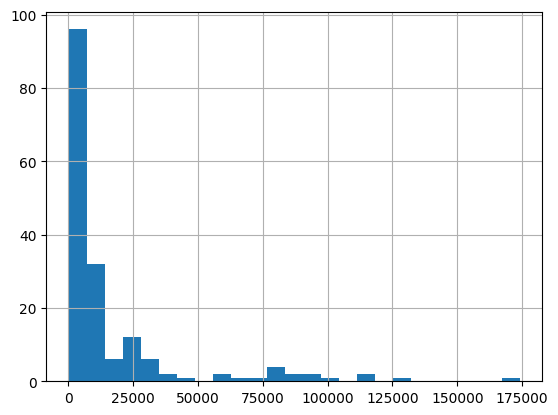

In [33]:
recent_grads['Men'].hist(bins=25, range=(100,174000))

<AxesSubplot: >

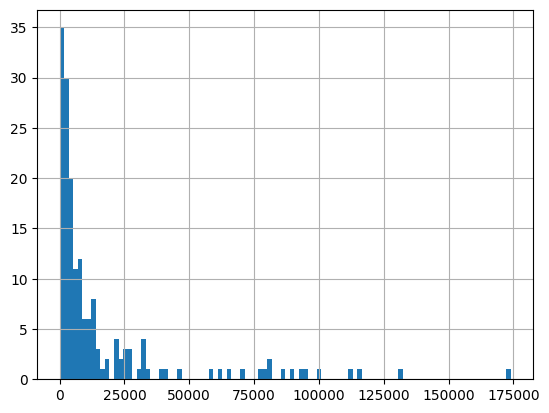

In [35]:
recent_grads['Men'].hist(bins=100, range=(100,174000))

<AxesSubplot: >

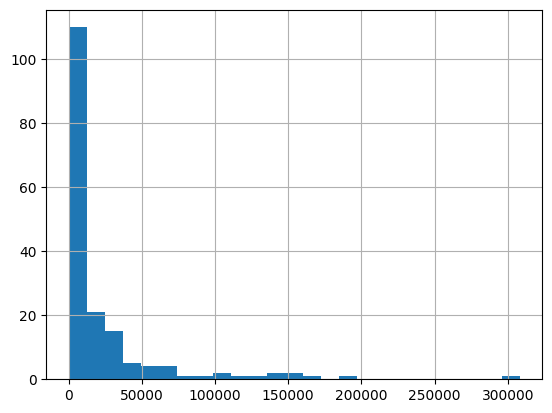

In [34]:
recent_grads['Women'].hist(bins=25, range=(0,308000))

<AxesSubplot: >

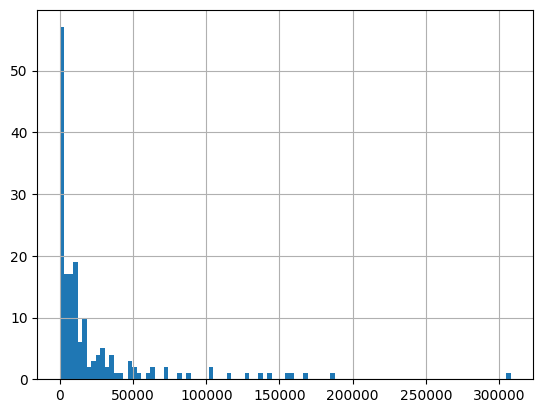

In [36]:
recent_grads['Women'].hist(bins=100, range=(0,308000))

### Scatter Matrix Plot

We will create a 2 by 2 scatter matrix plot using the Sample_size and Median columns.

We will also create a 3 by 3 scatter matrix plot using the Sample_size, Median, and Unemployment_rate columns.

Then we will explore the questions from the last few steps using these scatter matrix plots.

In [37]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot: xlabel='Sample_size', ylabel='Sample_size'>,
        <AxesSubplot: xlabel='Median', ylabel='Sample_size'>],
       [<AxesSubplot: xlabel='Sample_size', ylabel='Median'>,
        <AxesSubplot: xlabel='Median', ylabel='Median'>]], dtype=object)

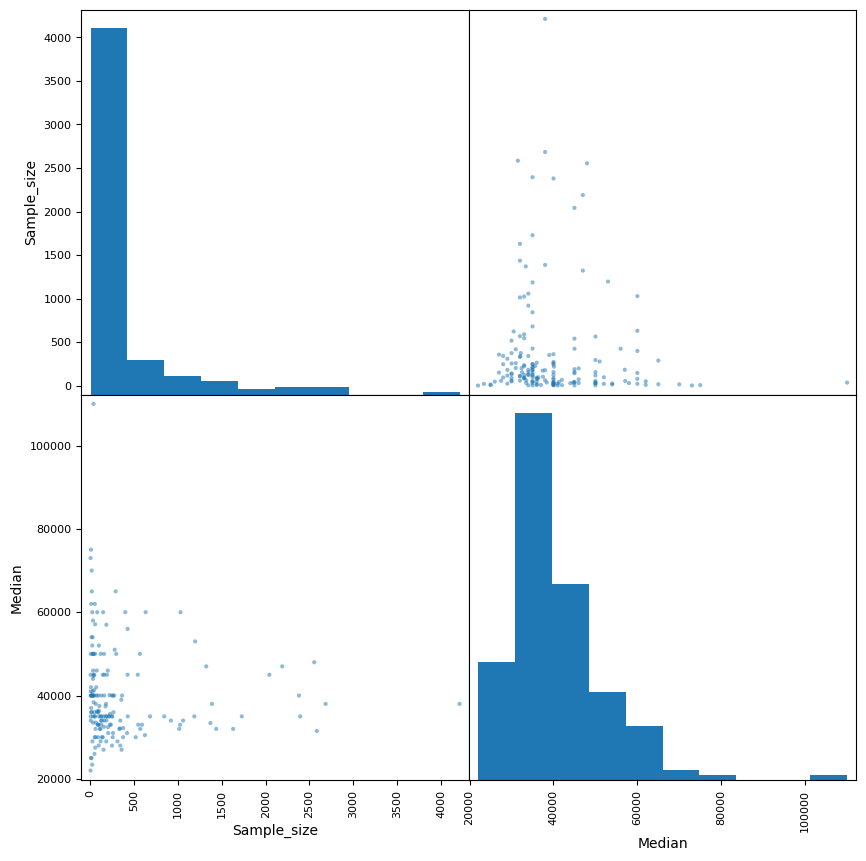

In [38]:
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))

array([[<AxesSubplot: xlabel='Sample_size', ylabel='Sample_size'>,
        <AxesSubplot: xlabel='Median', ylabel='Sample_size'>,
        <AxesSubplot: xlabel='Unemployment_rate', ylabel='Sample_size'>],
       [<AxesSubplot: xlabel='Sample_size', ylabel='Median'>,
        <AxesSubplot: xlabel='Median', ylabel='Median'>,
        <AxesSubplot: xlabel='Unemployment_rate', ylabel='Median'>],
       [<AxesSubplot: xlabel='Sample_size', ylabel='Unemployment_rate'>,
        <AxesSubplot: xlabel='Median', ylabel='Unemployment_rate'>,
        <AxesSubplot: xlabel='Unemployment_rate', ylabel='Unemployment_rate'>]],
      dtype=object)

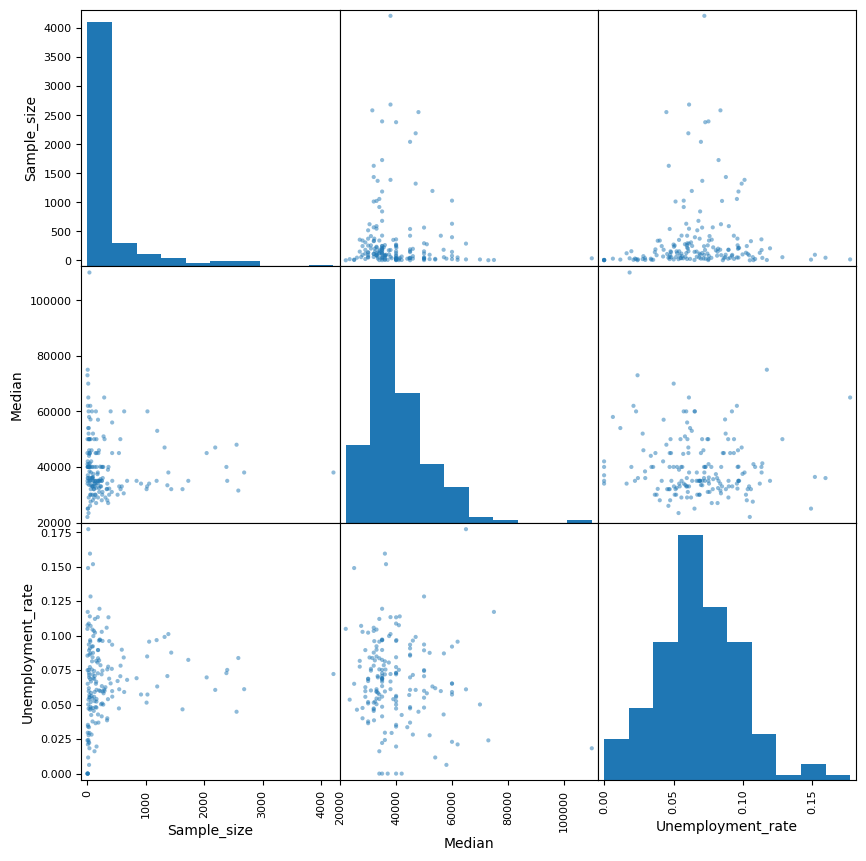

In [39]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10))

### Bar Plots

We will use bar plots to compare the percentages of women (ShareWomen) from the first ten rows and last ten rows of the recent_grads dataframe.

We will also use bar plots to compare the unemployment rate (Unemployment_rate) from the first ten rows and last ten rows of the recent_grads dataframe.

<AxesSubplot: ylabel='Major'>

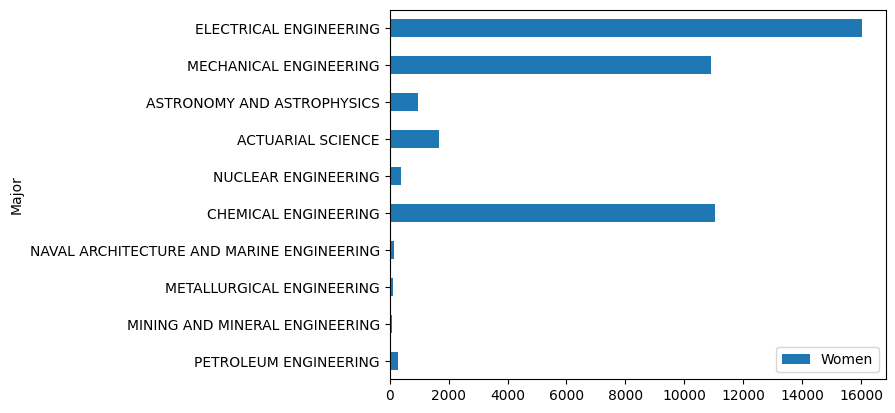

In [44]:
recent_grads[:10].plot.barh(x='Major', y='Women')

<AxesSubplot: >

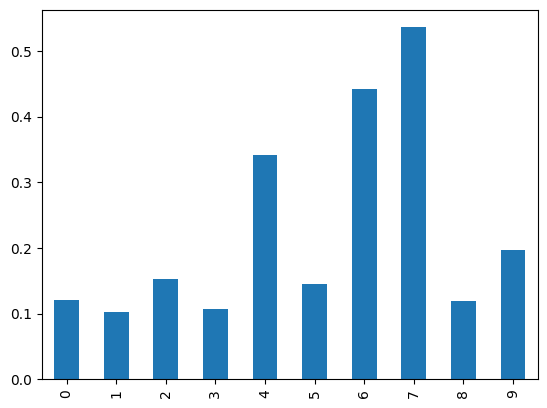

In [40]:
recent_grads[:10]['ShareWomen'].plot(kind='bar')

<AxesSubplot: ylabel='Major'>

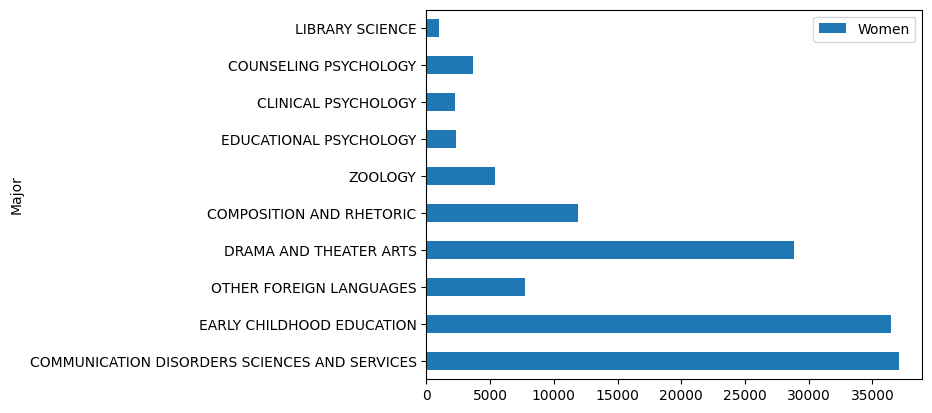

In [49]:
recent_grads[-10:].plot.barh(x='Major', y='Women')

<AxesSubplot: >

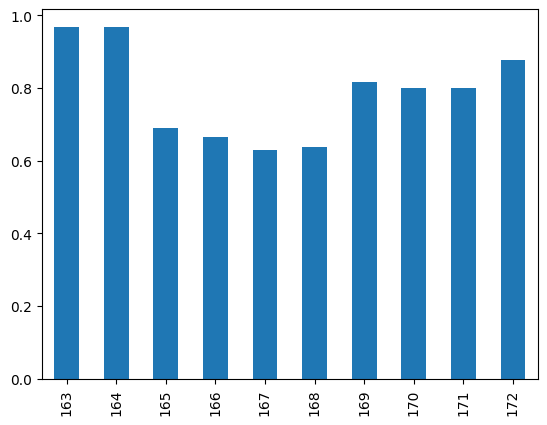

In [50]:
recent_grads[-10:]['ShareWomen'].plot(kind='bar')

<AxesSubplot: ylabel='Major'>

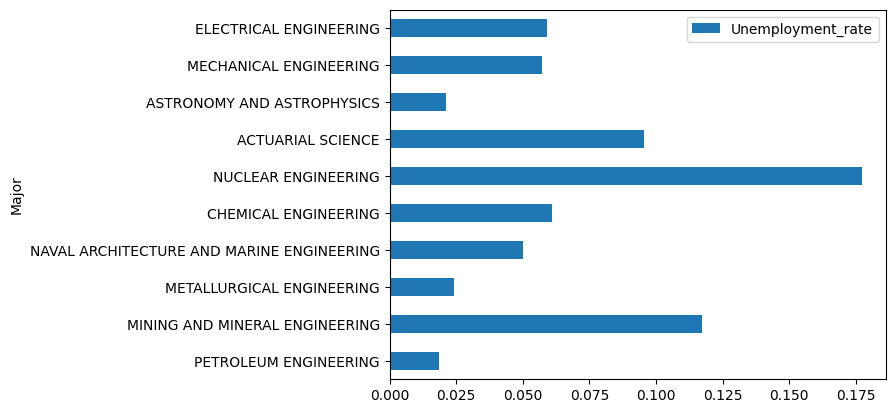

In [47]:
recent_grads[:10].plot.barh(x='Major', y='Unemployment_rate')

<AxesSubplot: >

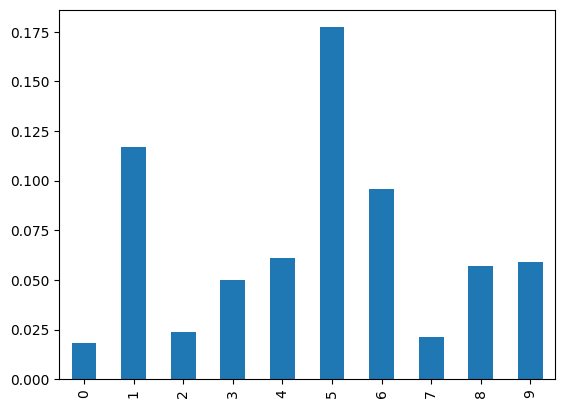

In [48]:
recent_grads[:10]['Unemployment_rate'].plot(kind='bar')

<AxesSubplot: ylabel='Major'>

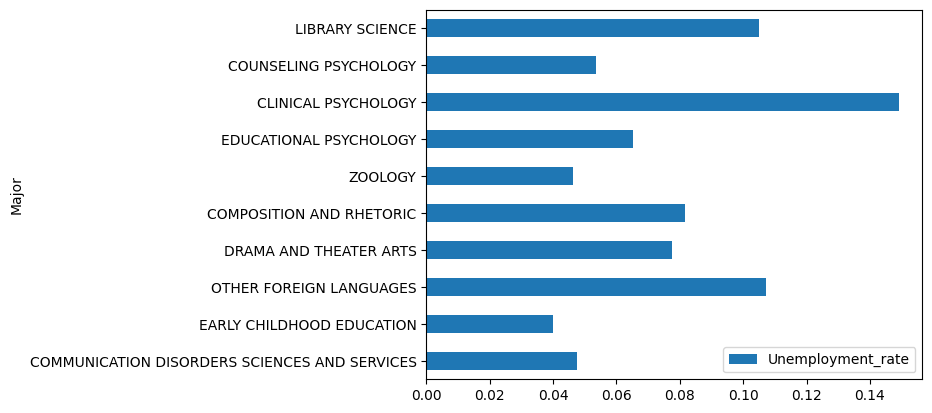

In [51]:
recent_grads[-10:].plot.barh(x='Major', y='Unemployment_rate')

<AxesSubplot: >

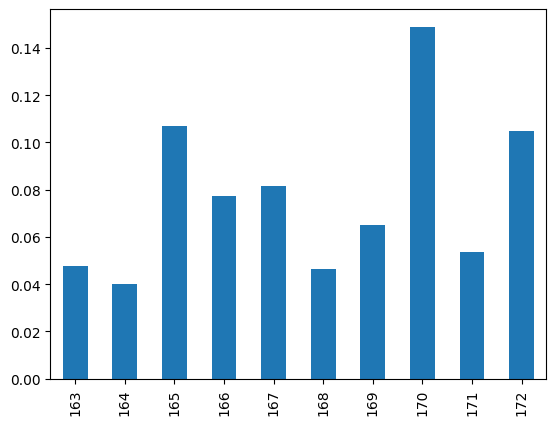

In [52]:
recent_grads[-10:]['Unemployment_rate'].plot(kind='bar')

### Further Analysis

Use a grouped bar plot to compare the number of men with the number of women in each category of majors.

Use a box plot to explore the distributions of median salaries and unemployment rate.

Use a hexagonal bin plot to visualize the columns that had dense scatter plots from earlier in the project.